the intercep is: [10.01373551]

the slope is: [0.79149796]

SSE = 10.770466593940604


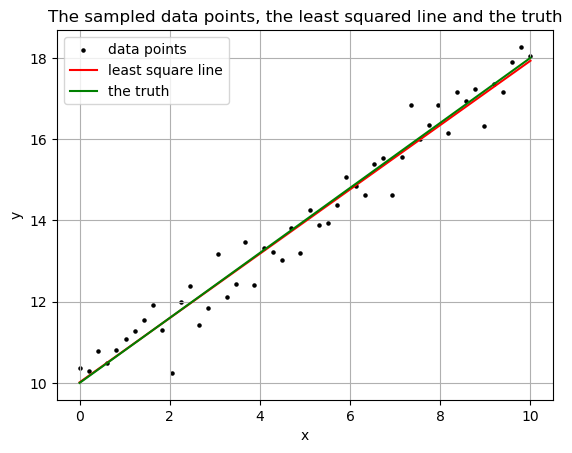

In [2]:
#This Python code is an exaple of solving the OLS problem using the closed-form solution formula

import numpy as np
import matplotlib.pyplot as plt


# Let's assume the truth behind the given data set is a linear function (1D example)
# Let's set up the true value of the interception and slope as follows:
Int_t= 10
Slope_t = 0.8

# The Synthetic data set can be generated as the linear output + normal noise
#
mu, sigma = 0, 0.5                      # parameters of the normal noise
N_sample = 50                             # number of sampled data points
rnd = np.random.normal(mu,sigma,N_sample)

x = np.linspace(0,10,N_sample)            #1D inputs
y_t = x*Slope_t + Int_t                   #true output
y = y_t + rnd               #target values = true output + noise

# let's create the design matrix and the target value vectore

x_v = x[:,np.newaxis]  #turn x into a column vector
x1 = np.ones(len(x))
x1 = x1[:,np.newaxis]  #create a column vector with all 1s

X = np.hstack([x1,x_v])  #this is the design matrix

y_v = y[:, np.newaxis] #turn y into a column vector

#estimate the weights using the closed-form solution formula
X_T = X.transpose()
X_T_X = np.matmul(X_T, X)
X_T_y = np.matmul(X_T, y_v)

W = np.matmul(np.linalg.inv(X_T_X), X_T_y)

y_hat = W[0]+x*W[1]  # the predictions for the inputs

res = y_hat - y      # the residule
SSE = np.inner(res, res)  # the sum of squared errors

print("the intercep is: {}\n".format(W[0]))
print("the slope is: {}\n".format(W[1]))
print("SSE = {}".format(SSE))

##creating the least-squared fitted line
plt.scatter(x, y, c="k", s=5, label="data points")
plt.plot(x, y_hat, 'r-', label="least square line")
plt.plot(x, y_t, 'g',label="the truth")
plt.title("The sampled data points, the least squared line and the truth")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.legend()



